In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
#time is in the form XXH:XXm:XXs, so we need to convert it to seconds
def convert_time(time):
    hours = int(time[0:2])
    mins = int(time[4:6])
    secs = int(time[8:10])
    return hours*3600 + mins*60 + secs

In [5]:
phases = pd.read_excel('phases/phases.xlsx')

/home/kchen/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [6]:
phases.head()

,vid_id,phase,time_start,time_end,labeler,notes
0,vid_0,oob,00H:00m:00s,00H:03m:18s,kc,NaN
1,vid_0,exposure,00H:03m:18s,00H:08m:44s,kc,NaN
2,vid_0,hiatal_dissec,00H:08m:45s,00H:16m:41s,kc,opening of lesser sac at 00H:12m:38s
3,vid_0,eso_mob,00H:16m:42s,00H:18m:21s,kc,NaN
4,vid_0,hiatal_dissec,00H:18m:22s,00H:19m:04s,kc,NaN


In [7]:
len(phases)

78

In [8]:
vid_id = phases['vid_id'][0]
vid_fname = str('raw_ids/' + vid_id + '.mp4')
phase = phases['phase'][0]
time_start = phases['time_start'][0]
time_end = phases['time_end'][0]

In [9]:
time_start_sec = convert_time(time_start)
time_end_sec = convert_time(time_end)
print(time_start_sec, time_end_sec)

0 198


In [12]:
phase_list = phases['phase'].unique()
phase_list

array(['oob', 'exposure', 'hiatal_dissec', 'eso_mob', 'fundus_mob',
       'sac_excision', 'hiatal_repair', 'peg_placement', 'wrap', 'other'],
      dtype=object)

In [13]:
for phase1 in phase_list:
    os.makedirs('frames/' + phase1)

In [10]:
#capture a frame every 2 seconds
for i in range(time_start_sec, time_end_sec):
    if i%2 == 0:
        cap = cv2.VideoCapture(vid_fname)
        cap.set(cv2.CAP_PROP_POS_MSEC, i*1000)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('frames/{}/{}_{}.jpg'.format(phase, vid_id, i), frame)
    else:
        continue
    cap.release()

In [15]:
for i in range(len(phases)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


In [16]:
for i in range(len(phases)):
    if i < 51:
        vid_id = phases['vid_id'][i]
        vid_fname = str('raw_ids/' + vid_id + '.mp4')
        phase = phases['phase'][i]
        time_start = phases['time_start'][i]
        time_end = phases['time_end'][i]
        time_start_sec = convert_time(time_start)
        time_end_sec = convert_time(time_end)
        for i in range(time_start_sec, time_end_sec):
            if i%5 == 0:
                cap = cv2.VideoCapture(vid_fname)
                cap.set(cv2.CAP_PROP_POS_MSEC, i*1000)
                ret, frame = cap.read()
                if ret:
                    if not os.path.exists('frames/train/{}'.format(phase)):
                        os.makedirs('frames/train/{}'.format(phase))
                    cv2.imwrite('frames/train/{}/{}_{}.jpg'.format(phase, vid_id, i), frame)
            else:
                continue
            cap.release()
    elif i >= 51:
        vid_id = phases['vid_id'][i]
        vid_fname = str('raw_ids/' + vid_id + '.mp4')
        phase = phases['phase'][i]
        time_start = phases['time_start'][i]
        time_end = phases['time_end'][i]
        time_start_sec = convert_time(time_start)
        time_end_sec = convert_time(time_end)
        for i in range(time_start_sec, time_end_sec):
            if i%5 == 0:
                cap = cv2.VideoCapture(vid_fname)
                cap.set(cv2.CAP_PROP_POS_MSEC, i*1000)
                ret, frame = cap.read()
                if ret:
                    if not os.path.exists('frames/test/{}'.format(phase)):
                        os.makedirs('frames/test/{}'.format(phase))
                    cv2.imwrite('frames/test/{}/{}_{}.jpg'.format(phase, vid_id, i), frame)
            else:
                continue
            cap.release()

In [3]:
#next we'll create a test set with unlabeled data
#we'll use the same method as above, but we'll just put the frames in a folder called 'test'
#we'll also create a csv file with the video id and the time of the frame

vid_id = 'vid_4'
vid_fname = str('raw_ids/' + vid_id + '.mp4')
time_start = '00H:00m:00s'
time_end = '01H:10m:06s'
time_start_sec = convert_time(time_start)
time_end_sec = convert_time(time_end)

In [5]:
save_dir = 'test'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for i in range(time_start_sec, time_end_sec):
    if i%5 == 0:
        cap = cv2.VideoCapture(vid_fname)
        cap.set(cv2.CAP_PROP_POS_MSEC, i*1000)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}/{}_{}.jpg'.format(save_dir, vid_id, i), frame)

In [11]:
#next, let's create a timeline for the first video, colored by phase
phase_df = pd.DataFrame(columns=['fname', 'phase'])
for i in os.listdir('frames/train'):
    for file in os.listdir('frames/train/{}'.format(i)):
        if file.startswith('vid_4'):
            phase_df = phase_df.append({'fname': file, 'phase': i}, ignore_index=True)

for i in os.listdir('frames/test'):
    for file in os.listdir('frames/test/{}'.format(i)):
        if file.startswith('vid_4'):
            phase_df = phase_df.append({'fname': file, 'phase': i}, ignore_index=True)

In [12]:
phase_df['fname'][0].split('_')[2].split('.')[0]

'205'

In [13]:
phase_df['time'] = phase_df['fname'].apply(lambda x: int(x.split('_')[2].split('.')[0]))
phase_df.head()

,fname,phase,time
0,vid_4_205.jpg,exposure,205
1,vid_4_150.jpg,exposure,150
2,vid_4_350.jpg,exposure,350
3,vid_4_345.jpg,exposure,345
4,vid_4_365.jpg,exposure,365


In [14]:
phase_df.sort_values(by='time', inplace=True)
phase_df.head()

,fname,phase,time
69,vid_4_0.jpg,oob,0
67,vid_4_5.jpg,oob,5
64,vid_4_10.jpg,oob,10
66,vid_4_15.jpg,oob,15
72,vid_4_20.jpg,oob,20


In [15]:
#now we can plot the timeline using PolyCollection
from matplotlib.collections import PolyCollection
phases_str = [phase for phase in phase_df['phase'].unique()]

In [16]:
phases_cat = {phase: i for i, phase in enumerate(phases_str)}

In [17]:
colormapping = {phase: 'C' + str(i) for i, phase in enumerate(phases_str)}
colormapping

{'oob': 'C0',
 'exposure': 'C1',
 'hiatal_dissec': 'C2',
 'fundus_mob': 'C3',
 'eso_mob': 'C4',
 'hiatal_repair': 'C5',
 'wrap': 'C6',
 'other': 'C7'}

In [18]:
phase_df.head()

,fname,phase,time
69,vid_4_0.jpg,oob,0
67,vid_4_5.jpg,oob,5
64,vid_4_10.jpg,oob,10
66,vid_4_15.jpg,oob,15
72,vid_4_20.jpg,oob,20


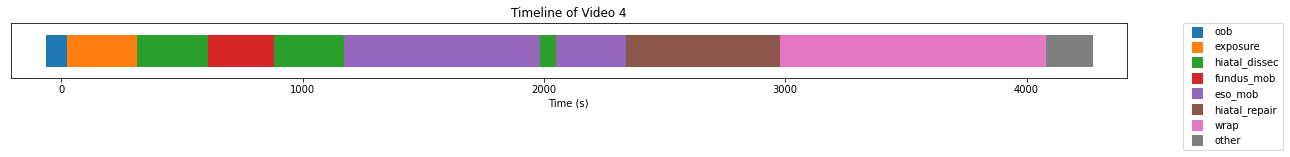

In [19]:
#make a scatterplot of the points, colored by phase
fig, ax = plt.subplots(figsize=(20, 1))
#make the points big square markers
ax.scatter(phase_df['time'], [0]*len(phase_df), c=phase_df['phase'].apply(lambda x: colormapping[x]), marker='s', s=1000)
ax.set_yticks([])
ax.set_xlabel('Time (s)')
ax.set_title('Timeline of Video 4')
#add a legend
handles = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=colormapping[phase], label=phase)[0]  for phase in phases_str]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [38]:
test_preds = pd.read_csv('test/preds.csv', index_col=0)
test_preds.head()

,oob,other,phase_1_exposure,phase_2_hiatal_dissec,phase_3_fundus,phase_4_eso,phase_5_hiatal_repair,phase_6_wrap,image_fname
0,0.014538,0.886879,0.018921,0.023483,0.011018,0.020968,0.010110,0.014082,vid_1_3565.jpg
1,0.000020,0.003363,0.000002,0.000039,0.000006,0.000007,0.003444,0.993120,vid_1_4860.jpg
2,0.002529,0.724156,0.000920,0.004356,0.001586,0.008698,0.093054,0.164701,vid_1_865.jpg
3,0.055615,0.735849,0.078103,0.053913,0.011322,0.059134,0.003744,0.002321,vid_1_2300.jpg
4,0.016452,0.783386,0.014081,0.029733,0.019636,0.024814,0.023533,0.088364,vid_1_2465.jpg


In [39]:
test_preds.set_index('image_fname', inplace=True)

In [40]:
#create a new column 'pred' which is the phase with the highest probability
test_preds['pred'] = test_preds.apply(lambda x: x.idxmax(), axis=1)
test_preds.head()

,oob,other,phase_1_exposure,phase_2_hiatal_dissec,phase_3_fundus,phase_4_eso,phase_5_hiatal_repair,phase_6_wrap,pred
image_fname,,,,,,,,,
vid_1_3565.jpg,0.014538,0.886879,0.018921,0.023483,0.011018,0.020968,0.010110,0.014082,other
vid_1_4860.jpg,0.000020,0.003363,0.000002,0.000039,0.000006,0.000007,0.003444,0.993120,phase_6_wrap
vid_1_865.jpg,0.002529,0.724156,0.000920,0.004356,0.001586,0.008698,0.093054,0.164701,other
vid_1_2300.jpg,0.055615,0.735849,0.078103,0.053913,0.011322,0.059134,0.003744,0.002321,other
vid_1_2465.jpg,0.016452,0.783386,0.014081,0.029733,0.019636,0.024814,0.023533,0.088364,other


In [41]:
test_preds['pred'].value_counts()

other                    693
phase_6_wrap             250
phase_2_hiatal_dissec    179
phase_1_exposure         109
oob                       64
phase_5_hiatal_repair     51
phase_4_eso               14
Name: pred, dtype: int64

In [42]:
fnames = [fname for fname in test_preds.index]
times = [int(fname.split('_')[2].split('.')[0]) for fname in fnames]
test_preds['time'] = times

In [43]:
test_df = test_preds[['time', 'pred']]
test_df.head()

,time,pred
image_fname,,
vid_1_3565.jpg,3565,other
vid_1_4860.jpg,4860,phase_6_wrap
vid_1_865.jpg,865,other
vid_1_2300.jpg,2300,other
vid_1_2465.jpg,2465,other


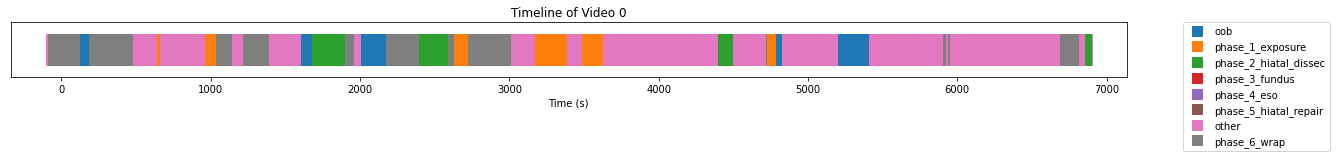

In [44]:
#now we can plot the timeline using PolyCollection
fig, ax = plt.subplots(figsize=(20, 1))
#make the points big square markers
ax.scatter(test_df['time'], [0]*len(test_df), c=test_df['pred'].apply(lambda x: colormapping[x]), marker='s', s=1000)
ax.set_yticks([])
ax.set_xlabel('Time (s)')
ax.set_title('Timeline of Video 0')
#add a legend
handles = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=colormapping[phase], label=phase)[0]  for phase in phases_str]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [50]:
oob = test_df.loc[test_df['pred'] == 'other']
oob.head()

,time,pred
image_fname,,
vid_1_3565.jpg,3565,other
vid_1_865.jpg,865,other
vid_1_2300.jpg,2300,other
vid_1_2465.jpg,2465,other
vid_1_270.jpg,270,other


In [51]:
#convert time to XXH:XXm:XXs format
def convert_time_back(time):
    hours = time//3600
    new_time = time - hours*3600
    minutes = new_time//60
    new_time = new_time - minutes*60
    seconds = new_time
    return '{}H:{}m:{}s'.format(hours, minutes, seconds)

In [52]:
oob['hhmmss'] = oob['time'].apply(lambda x: convert_time_back(x))

/tmp/ipykernel_706724/2466309794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oob['hhmmss'] = oob['time'].apply(lambda x: convert_time_back(x))


In [53]:
oob.head(50)

,time,pred,hhmmss
image_fname,,,
vid_1_3565.jpg,3565,other,0H:59m:25s
vid_1_865.jpg,865,other,0H:14m:25s
vid_1_2300.jpg,2300,other,0H:38m:20s
vid_1_2465.jpg,2465,other,0H:41m:5s
vid_1_270.jpg,270,other,0H:4m:30s
vid_1_720.jpg,720,other,0H:12m:0s
vid_1_985.jpg,985,other,0H:16m:25s
vid_1_6020.jpg,6020,other,1H:40m:20s
vid_1_5765.jpg,5765,other,1H:36m:5s
